# Flight Price Prediction

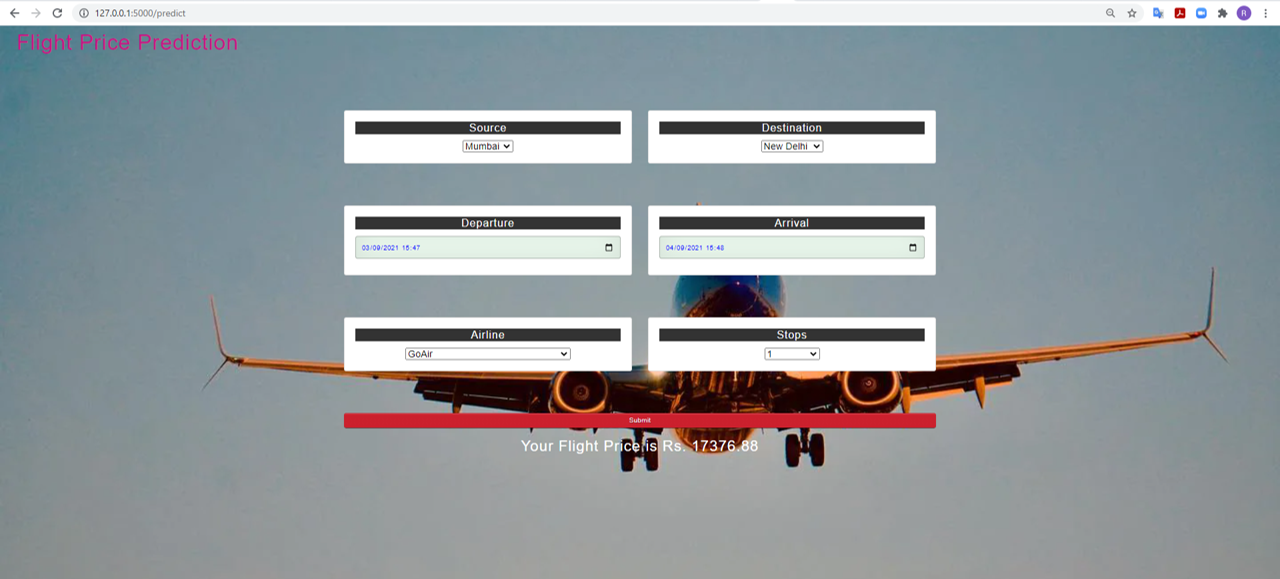

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# connecting kaggle api to notebook
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
#Downloading dataset from Kaggle 
api.dataset_download_files('nikhilmittal/flight-fare-prediction-mh') 
#Path inside the brackets is — username (of_person_who_published_dataset)/name (of_the_Kaggle_dataset).

In [4]:
# downloading as zipfile and extracting the data
from zipfile import ZipFile
zf = ZipFile('flight-fare-prediction-mh.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

In [5]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [7]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df=df.dropna(how='any')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [10]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [11]:
df.Total_Stops.dtype

dtype('O')

In [12]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [13]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [14]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
df.Destination=df.Destination.replace({'Delhi':'New Delhi'})

### Price based on Source and destination

In [16]:
df.groupby(['Source','Destination'])['Price'].mean()

Source    Destination
Banglore  New Delhi       8017.464269
Chennai   Kolkata         4789.892388
Delhi     Cochin         10540.113536
Kolkata   Banglore        9158.389411
Mumbai    Hyderabad       5059.708752
Name: Price, dtype: float64

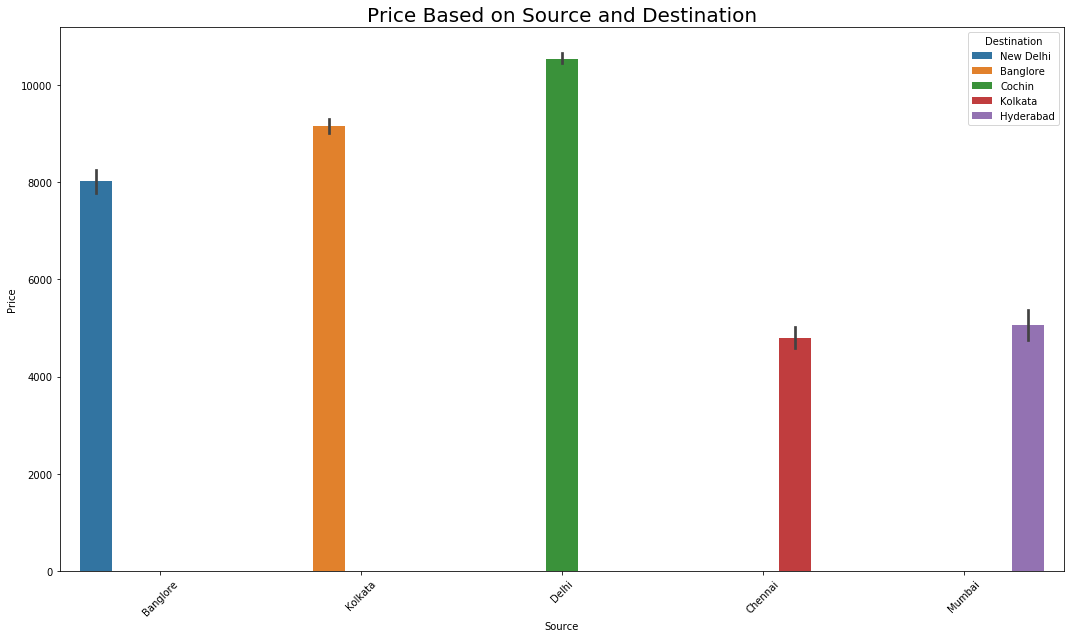

In [17]:
plt.figure(figsize=(18,10))
sns.barplot(x=df['Source'],y=df['Price'],hue=df['Destination'])
plt.title('Price Based on Source and Destination',fontdict = {'fontsize' : 20},loc ='center', )
plt.xticks(rotation=45)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Price based on Airline and Duration

In [18]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

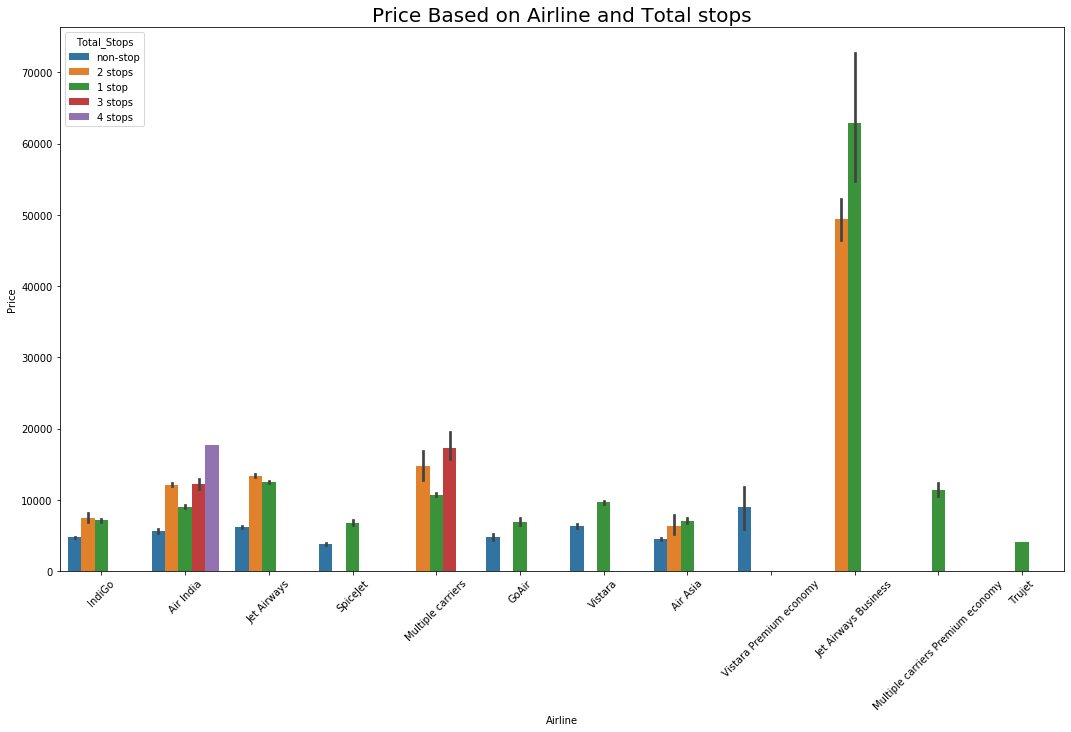

In [19]:
plt.figure(figsize=(18,10))
sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'])
plt.title('Price Based on Airline and Total stops',fontdict = {'fontsize' : 20},loc ='center', )
plt.xticks(rotation=45)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [20]:
#One hot encoding  converting categorical columns to numerical columns

Airline_dummy=pd.get_dummies(df['Airline'],drop_first=True)
Airline_dummy.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [21]:
df.Date_of_Journey.head()

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

In [22]:
df['Day_of_Journey']=df.Date_of_Journey.apply(lambda x: x.split('/')).apply(lambda x: x[0])
df['Day_of_Journey']=df.Day_of_Journey.astype('int64')

In [23]:
df['Month_of_Journey']=df.Date_of_Journey.apply(lambda x: x.split('/')).apply(lambda x: x[1])
df['Month_of_Journey']=df.Month_of_Journey.astype('int64')

In [24]:
#df.Date_of_Journey=pd.to_datetime(df.Date_of_Journey)

In [25]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey'],
      dtype='object')

In [26]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [27]:
df['Dep_hr']=df.Dep_Time.apply(lambda x: x.split(':')).apply(lambda x: x[0])
df['Dep_hr']=df['Dep_hr'].astype('int64')

In [28]:
df['Dep_min']=df.Dep_Time.apply(lambda x: x.split(':')).apply(lambda x: x[0])
df['Dep_min']=df['Dep_min'].astype('int64')

In [29]:

df['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [30]:
lst_dur=list(df['Duration'])
lst_hour=[]
lst_min=[]

In [31]:
for i in range(len(lst_dur)):
    if len(lst_dur[i].split())!=2:
        if 'h' in lst_dur[i]:
            lst_dur[i]=lst_dur[i].strip()+' 0m'
        else:
            lst_dur[i]='0h '+lst_dur[i]
        

In [32]:
lst2=[]
lst3=[]
lst1=lst_dur
for i in range(len(lst1)):
    lst1[i]=lst1[i].split(' ')
    lst1[i][0]=lst1[i][0]
    lst1[i][0]=lst1[i][0].split('h')
    lst1[i][1]=lst1[i][1].split('m')
    lst2.append(int(lst1[i][0][0]))
    lst3.append(int(lst1[i][1][0]))

df['duration_hr']=lst2
df['duration_min']=lst3

In [33]:
#df.Dep_Time.head()
df['Arrival_hr']=df.Arrival_Time.apply(lambda x: x.split(':')).apply(lambda x: x[0])
df['Arrival_hr']=df['Arrival_hr'].astype('int64')

In [34]:
df['Arrival_min']=df.Arrival_Time.apply(lambda x: x.split(':')).apply(lambda x: x[1])
df['Arrival_min']=df.Arrival_min.apply(lambda x: x.split(' ')).apply(lambda x: x[0]).astype('int64')#=df['Arrival_min'].astype('int64')
df['Arrival_min'].head()

0    10
1    15
2    25
3    30
4    35
Name: Arrival_min, dtype: int64

In [35]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [36]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
New Delhi    2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
New Delhi    2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [38]:
Dest_Source_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True) # one hot encoding
#Desination_dummy=pd.get_dummies(df.Destination,drop_first=True) # one hot encoding


In [39]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
#Total_Stops_dummy=pd.get_dummies(df.Total_Stops,drop_first=True) # one hot encoding

In [41]:
df['Total_Stops']=df['Total_Stops'].map({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4})#pd.get_dummies(df.Total_Stops,drop_first=True) # one hot encoding

In [42]:
#Total_Stops_dummy.head()

In [43]:
#df=pd.concat([Airline_dummy,Source_dummy,Desination_dummy,Total_Stops_dummy,df],axis=1)

In [44]:
df=pd.concat([Airline_dummy,Dest_Source_dummy,df],axis=1)


In [45]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hr', 'Dep_min', 'duration_hr', 'duration_min', 'Arrival_hr',
       'Arrival_min'],
      dtype='object')

In [46]:
df=df.drop(['Airline','Date_of_Journey', 'Source', 'Destination', 'Route','Duration','Arrival_Time'],axis=1)

In [47]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Dep_Time', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'duration_hr', 'duration_min',
       'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [48]:
#df.Route.value_counts()

In [49]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [50]:
df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [51]:
df.Additional_Info=df.Additional_Info.replace({'No Info':'No info'})

In [52]:
df.Additional_Info.value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [53]:
df.Additional_Info=df.Additional_Info.replace({'No info':0,'In-flight meal not included':1,'No check-in baggage included':2,'1 Long layover':3,'Change airports':4,'Business class':5,'2 Long layover':6,'Red-eye flight':7,'1 Short layover':8})


In [54]:
#Additional_Info_dummy=pd.get_dummies(df.Additional_Info,drop_first=True) # one hot encoding

In [55]:
#df=pd.concat([Additional_Info_dummy,df],axis=1)

In [56]:
#df.Additional_Info.value_counts()
df=df.drop(['Dep_Time'],axis=1)

In [57]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,duration_hr,duration_min,Arrival_hr,Arrival_min
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,22,2,50,1,10
1,1,0,0,0,0,0,0,0,0,0,...,0,7662,1,5,5,5,7,25,13,15
2,0,0,0,1,0,0,0,0,0,0,...,0,13882,9,6,9,9,19,0,4,25
3,0,0,1,0,0,0,0,0,0,0,...,0,6218,12,5,18,18,5,25,23,30
4,0,0,1,0,0,0,0,0,0,0,...,0,13302,1,3,16,16,4,45,21,35


In [58]:
df.columns


Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'duration_hr', 'duration_min',
       'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [59]:
#df.info()

In [60]:
#X_train.corr()

In [61]:
#plt.figure(figsize=(12, 9))
#sns.heatmap(X_train.corr(),annot=True,cmap='RdYlGn');

# Test data preprocessing

In [62]:
df_test=pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [63]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [65]:
df_test.Source.value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [66]:
df_test.Destination.value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [67]:
df_test.Total_Stops.value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [68]:
df_test.Additional_Info.value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [69]:
#One hot encoding  converting categorical columns to numerical columns

Airline_test_dummy=pd.get_dummies(df_test['Airline'],drop_first=True) # one hot encoding
Airline_test_dummy.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [70]:
# one hot encoding
Source_test_dummy=pd.get_dummies(df_test.Source,drop_first=True)
Desination_test_dummy=pd.get_dummies(df_test.Destination,drop_first=True)
Additional_Info_test_dummy=pd.get_dummies(df_test.Additional_Info,drop_first=True)
Total_Stops_test_dummy=pd.get_dummies(df_test.Total_Stops,drop_first=True)

In [71]:
df_test=pd.concat([Airline_test_dummy,Additional_Info_test_dummy,Source_test_dummy,Desination_test_dummy,Total_Stops_test_dummy,df_test],axis=1)

In [72]:
df_test['Date']=df_test.Date_of_Journey.apply(lambda x: x.split('/')).apply(lambda x: x[0])
df_test['Date']=df_test.Date.astype('int64')

In [73]:
df_test['Month']=df_test.Date_of_Journey.apply(lambda x: x.split('/')).apply(lambda x: x[1])
df_test['Month']=df_test.Month.astype('int64')

In [74]:
df_test['Dep_Hour']=df_test.Dep_Time.apply(lambda x: x.split(':')).apply(lambda x: x[0])
df_test['Dep_Hour']=df_test['Dep_Hour'].astype('int64')

In [75]:
df_test['Dep_Min']=df_test.Dep_Time.apply(lambda x: x.split(':')).apply(lambda x: x[0])
df_test['Dep_Min']=df_test['Dep_Min'].astype('int64')

In [76]:
lst_test_dur=list(df_test['Duration'])
lst_test_hour=[]
lst_test_min=[]

In [77]:
for i in range(len(lst_test_dur)):
    if len(lst_test_dur[i].split())!=2:
        if 'h' in lst_test_dur[i]:
            lst_test_dur[i]=lst_test_dur[i].strip()+' 0m'
        else:
            lst_test_dur[i]='0h '+lst_test_dur[i]

In [78]:
lst2test_=[]
lst3test_=[]
lst1test_=lst_test_dur
for i in range(len(lst1test_)):
    lst1test_[i]=lst1test_[i].split(' ')
    lst1test_[i][0]=lst1test_[i][0]
    lst1test_[i][0]=lst1test_[i][0].split('h')
    lst1test_[i][1]=lst1test_[i][1].split('m')
    lst2test_.append(int(lst1test_[i][0][0]))
    lst3test_.append(int(lst1test_[i][1][0]))

df_test['Duration_hour']=lst2test_
df_test['Duration_min']=lst3test_

In [79]:
df_test['Arrival_hour']=df_test.Arrival_Time.apply(lambda x: x.split(':')).apply(lambda x: x[0])
df_test['Arrival_hour']=df_test['Arrival_hour'].astype('int64')

In [80]:
df_test['Arrival_min']=df_test.Arrival_Time.apply(lambda x: x.split(':')).apply(lambda x: x[1])
df_test['Arrival_min']=df_test.Arrival_min.apply(lambda x: x.split(' ')).apply(lambda x: x[0]).astype('int64')#=df['Arrival_min'].astype('int64')


In [81]:
df_test.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Business class',
       'Change airports', 'In-flight meal not included',
       'No check-in baggage included', 'No info', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', '2 stops', '3 stops', '4 stops', 'non-stop', 'Airline',
       'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Date',
       'Month', 'Dep_Hour', 'Dep_Min', 'Duration_hour', 'Duration_min',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [82]:
df_test=df_test.drop(['Airline','Date_of_Journey', 'Source', 'Destination', 'Route','Duration','Total_Stops','Arrival_Time','Additional_Info'],axis=1)

In [83]:
df_test.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,non-stop,Dep_Time,Date,Month,Dep_Hour,Dep_Min,Duration_hour,Duration_min,Arrival_hour,Arrival_min
0,0,0,0,1,0,0,0,0,0,0,...,0,17:30,6,6,17,17,10,55,4,25
1,0,0,1,0,0,0,0,0,0,0,...,0,06:20,12,5,6,6,4,0,10,20
2,0,0,0,1,0,0,0,0,0,0,...,0,19:15,21,5,19,19,23,45,19,0
3,0,0,0,0,0,1,0,0,0,0,...,0,08:00,21,5,8,8,13,0,21,0
4,0,0,0,0,0,0,0,0,0,0,...,1,23:55,24,6,23,23,2,50,2,45


In [84]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [85]:
X.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Total_Stops', 'Additional_Info', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hr', 'Dep_min', 'duration_hr', 'duration_min', 'Arrival_hr',
       'Arrival_min'],
      dtype='object')

In [86]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [87]:
df_test.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Business class',
       'Change airports', 'In-flight meal not included',
       'No check-in baggage included', 'No info', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', '2 stops', '3 stops', '4 stops', 'non-stop', 'Dep_Time',
       'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Duration_hour', 'Duration_min',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

### Splitting the dataset

In [88]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
r2_scores=[]

## Linear Regression

In [90]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [91]:
y_pred_lin_reg=lin_reg.predict(X_test)
r2_scores.append(('LinearRegression',r2_score(y_test,y_pred_lin_reg)))

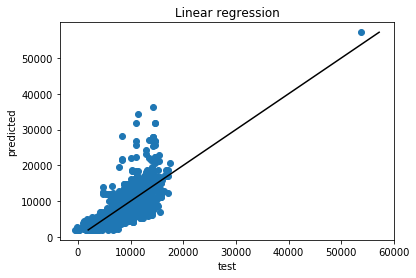

In [92]:
plt.scatter(y_pred_lin_reg,y_test)
plt.title('Linear regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

## Random Forest Regression

In [93]:
rdf=RandomForestRegressor()


In [94]:
rdf.fit(X_train,y_train)

RandomForestRegressor()

In [95]:
y_pred_rdf=rdf.predict(X_test)
print(r2_score(y_test,y_pred_rdf))
r2_scores.append(('RandomForestRegressor',r2_score(y_test,y_pred_rdf)))

0.8719613649651743


### Feature Imporatance Random Forest Regression

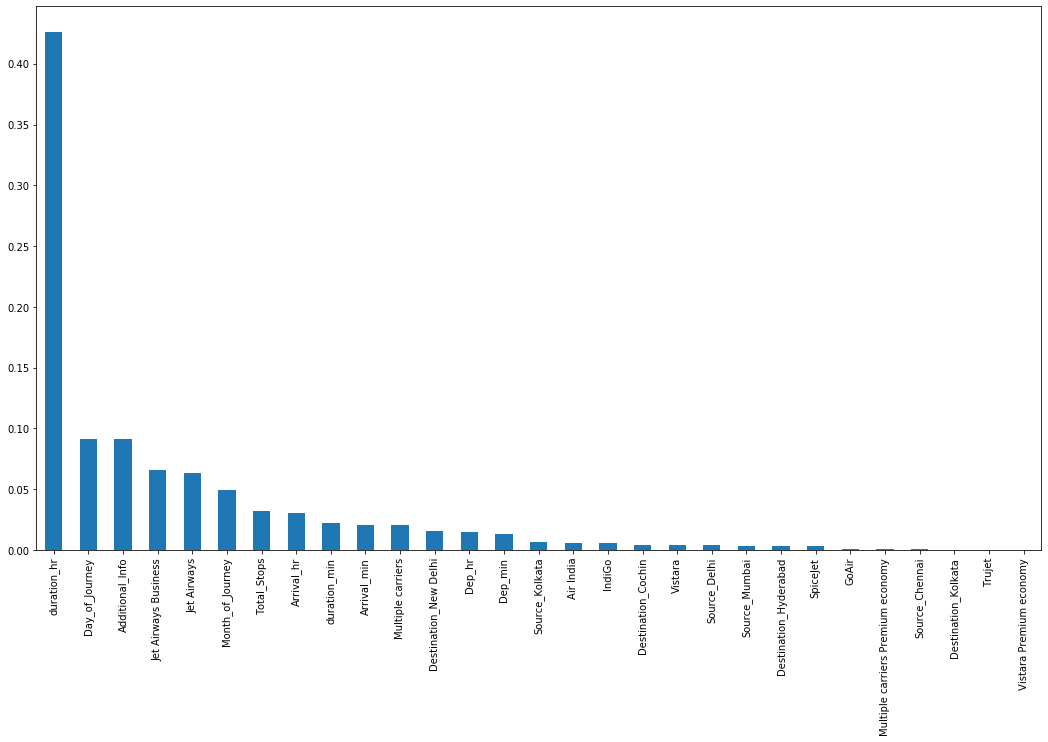

In [96]:
pd.Series(rdf.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10));

## Extra Tree Regression

In [97]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
extr=ExtraTreesRegressor()
extr.fit(X_train,y_train)
y_pred_extr=extr.predict(X_test)


from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_extr))
r2_scores.append(('ExtraTreesRegressor',r2_score(y_test,y_pred_extr)))


0.9164236354708359


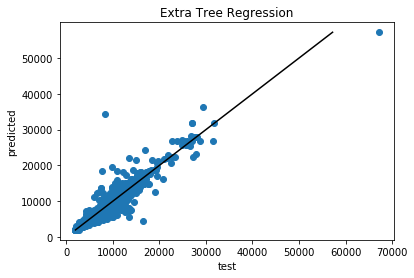

In [98]:
plt.scatter(y_pred_extr,y_test)
plt.title('Extra Tree Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

### Feature Imporatance Extra Tree Regression

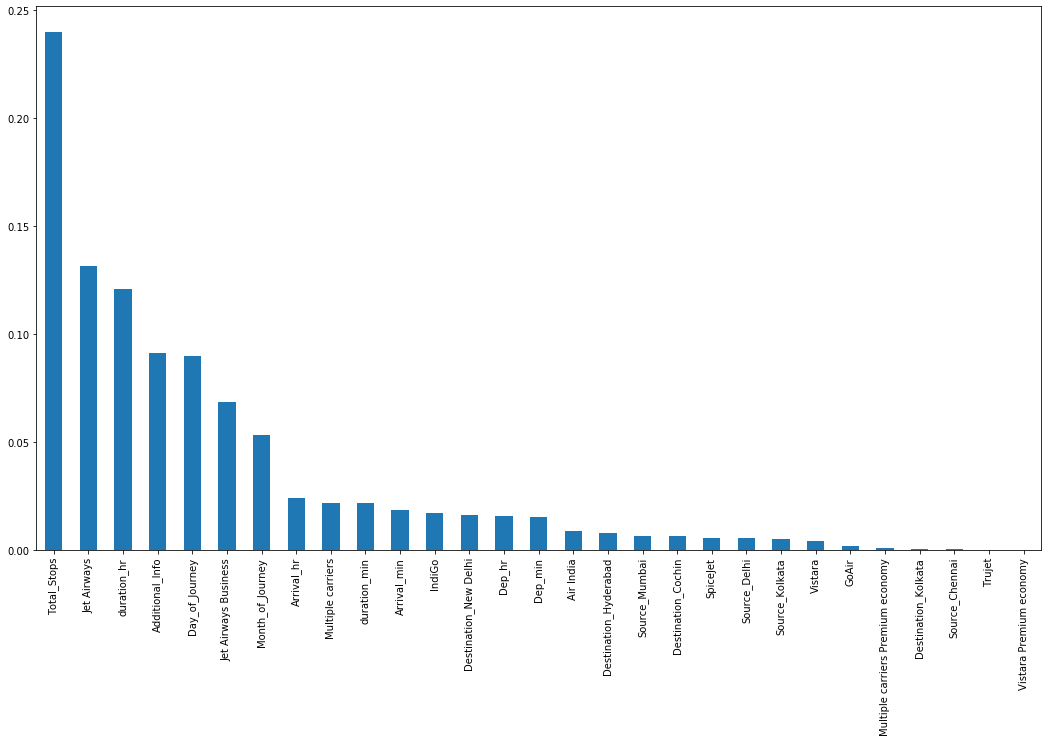

In [99]:
pd.Series(extr.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10));

## CatBoost Regression

In [100]:
#!pip install catboost

In [101]:
from catboost import CatBoostRegressor

cbr=CatBoostRegressor()
cbr.fit(X_train,y_train)
y_pred_cbr=cbr.predict(X_test)
print(r2_score(y_test,y_pred_cbr))
r2_scores.append(('CatBoostRegressor',r2_score(y_test,y_pred_cbr)))

Learning rate set to 0.05718
0:	learn: 4443.9685811	total: 137ms	remaining: 2m 16s
1:	learn: 4285.9215498	total: 139ms	remaining: 1m 9s
2:	learn: 4136.4843784	total: 141ms	remaining: 47s
3:	learn: 4015.1549641	total: 144ms	remaining: 35.8s
4:	learn: 3903.6551504	total: 146ms	remaining: 29s
5:	learn: 3786.6822415	total: 149ms	remaining: 24.6s
6:	learn: 3691.6566906	total: 152ms	remaining: 21.6s
7:	learn: 3586.1717404	total: 155ms	remaining: 19.2s
8:	learn: 3494.5502724	total: 157ms	remaining: 17.3s
9:	learn: 3401.9509751	total: 160ms	remaining: 15.8s
10:	learn: 3320.6929543	total: 164ms	remaining: 14.8s
11:	learn: 3244.2417960	total: 167ms	remaining: 13.8s
12:	learn: 3187.7612658	total: 169ms	remaining: 12.9s
13:	learn: 3122.0373479	total: 172ms	remaining: 12.1s
14:	learn: 3057.8566602	total: 174ms	remaining: 11.4s
15:	learn: 3000.3382479	total: 177ms	remaining: 10.9s
16:	learn: 2960.4714175	total: 179ms	remaining: 10.4s
17:	learn: 2909.3944693	total: 181ms	remaining: 9.89s
18:	learn: 2

151:	learn: 1772.9529114	total: 523ms	remaining: 2.92s
152:	learn: 1769.9544583	total: 526ms	remaining: 2.91s
153:	learn: 1768.1679415	total: 528ms	remaining: 2.9s
154:	learn: 1766.6922271	total: 530ms	remaining: 2.89s
155:	learn: 1763.1569265	total: 532ms	remaining: 2.88s
156:	learn: 1760.4669036	total: 535ms	remaining: 2.87s
157:	learn: 1757.2166243	total: 537ms	remaining: 2.86s
158:	learn: 1755.2288214	total: 539ms	remaining: 2.85s
159:	learn: 1752.4013674	total: 541ms	remaining: 2.84s
160:	learn: 1749.6732907	total: 543ms	remaining: 2.83s
161:	learn: 1748.6330013	total: 545ms	remaining: 2.82s
162:	learn: 1744.9464969	total: 547ms	remaining: 2.81s
163:	learn: 1742.6876483	total: 550ms	remaining: 2.8s
164:	learn: 1741.1374098	total: 552ms	remaining: 2.79s
165:	learn: 1739.1476277	total: 554ms	remaining: 2.78s
166:	learn: 1737.0529146	total: 556ms	remaining: 2.77s
167:	learn: 1733.4828099	total: 558ms	remaining: 2.76s
168:	learn: 1731.3205686	total: 561ms	remaining: 2.76s
169:	learn: 

301:	learn: 1558.1508929	total: 847ms	remaining: 1.96s
302:	learn: 1556.1811781	total: 849ms	remaining: 1.95s
303:	learn: 1554.7078555	total: 851ms	remaining: 1.95s
304:	learn: 1554.0331666	total: 853ms	remaining: 1.94s
305:	learn: 1553.3622066	total: 856ms	remaining: 1.94s
306:	learn: 1551.7277751	total: 859ms	remaining: 1.94s
307:	learn: 1550.8977148	total: 861ms	remaining: 1.93s
308:	learn: 1549.6289898	total: 863ms	remaining: 1.93s
309:	learn: 1547.8709708	total: 865ms	remaining: 1.92s
310:	learn: 1547.4154655	total: 867ms	remaining: 1.92s
311:	learn: 1547.3938753	total: 869ms	remaining: 1.92s
312:	learn: 1547.3729598	total: 871ms	remaining: 1.91s
313:	learn: 1546.0102005	total: 873ms	remaining: 1.91s
314:	learn: 1545.4071285	total: 875ms	remaining: 1.9s
315:	learn: 1545.3769641	total: 877ms	remaining: 1.9s
316:	learn: 1544.2879391	total: 878ms	remaining: 1.89s
317:	learn: 1541.6744784	total: 881ms	remaining: 1.89s
318:	learn: 1540.5528194	total: 884ms	remaining: 1.89s
319:	learn: 

451:	learn: 1407.8531787	total: 1.17s	remaining: 1.42s
452:	learn: 1406.7186008	total: 1.17s	remaining: 1.42s
453:	learn: 1406.7076770	total: 1.17s	remaining: 1.41s
454:	learn: 1405.3073782	total: 1.18s	remaining: 1.41s
455:	learn: 1404.3406483	total: 1.18s	remaining: 1.41s
456:	learn: 1402.9939253	total: 1.18s	remaining: 1.4s
457:	learn: 1402.3596012	total: 1.18s	remaining: 1.4s
458:	learn: 1401.7914315	total: 1.19s	remaining: 1.4s
459:	learn: 1401.3461062	total: 1.19s	remaining: 1.39s
460:	learn: 1399.8781378	total: 1.19s	remaining: 1.39s
461:	learn: 1398.9052105	total: 1.19s	remaining: 1.39s
462:	learn: 1397.5195730	total: 1.19s	remaining: 1.39s
463:	learn: 1397.5092080	total: 1.2s	remaining: 1.38s
464:	learn: 1395.7919627	total: 1.2s	remaining: 1.38s
465:	learn: 1395.4029666	total: 1.2s	remaining: 1.38s
466:	learn: 1394.8534102	total: 1.2s	remaining: 1.37s
467:	learn: 1392.8858436	total: 1.2s	remaining: 1.37s
468:	learn: 1392.8760993	total: 1.21s	remaining: 1.36s
469:	learn: 1392.8

601:	learn: 1295.3286622	total: 1.5s	remaining: 990ms
602:	learn: 1294.5067420	total: 1.5s	remaining: 987ms
603:	learn: 1293.7294208	total: 1.5s	remaining: 985ms
604:	learn: 1293.0070129	total: 1.5s	remaining: 982ms
605:	learn: 1293.0015851	total: 1.51s	remaining: 979ms
606:	learn: 1292.6571146	total: 1.51s	remaining: 977ms
607:	learn: 1292.6518733	total: 1.51s	remaining: 974ms
608:	learn: 1291.3709295	total: 1.51s	remaining: 972ms
609:	learn: 1291.2160992	total: 1.51s	remaining: 969ms
610:	learn: 1289.7708123	total: 1.52s	remaining: 966ms
611:	learn: 1289.3479782	total: 1.52s	remaining: 964ms
612:	learn: 1288.8563993	total: 1.52s	remaining: 961ms
613:	learn: 1287.1284864	total: 1.52s	remaining: 958ms
614:	learn: 1287.0159310	total: 1.53s	remaining: 955ms
615:	learn: 1285.9920823	total: 1.53s	remaining: 953ms
616:	learn: 1284.8107931	total: 1.53s	remaining: 950ms
617:	learn: 1284.3527434	total: 1.53s	remaining: 947ms
618:	learn: 1283.7704066	total: 1.53s	remaining: 944ms
619:	learn: 12

751:	learn: 1201.6949190	total: 1.83s	remaining: 604ms
752:	learn: 1201.0455117	total: 1.83s	remaining: 601ms
753:	learn: 1200.5696210	total: 1.84s	remaining: 599ms
754:	learn: 1200.0122154	total: 1.84s	remaining: 597ms
755:	learn: 1199.3544032	total: 1.84s	remaining: 594ms
756:	learn: 1198.6623966	total: 1.84s	remaining: 591ms
757:	learn: 1197.7859962	total: 1.84s	remaining: 589ms
758:	learn: 1197.3380482	total: 1.85s	remaining: 586ms
759:	learn: 1196.6948897	total: 1.85s	remaining: 584ms
760:	learn: 1196.5796532	total: 1.85s	remaining: 582ms
761:	learn: 1195.5120372	total: 1.85s	remaining: 579ms
762:	learn: 1195.5082817	total: 1.85s	remaining: 576ms
763:	learn: 1195.0185682	total: 1.86s	remaining: 574ms
764:	learn: 1194.3257575	total: 1.86s	remaining: 571ms
765:	learn: 1194.3222751	total: 1.86s	remaining: 569ms
766:	learn: 1193.6124423	total: 1.86s	remaining: 566ms
767:	learn: 1192.7681297	total: 1.87s	remaining: 564ms
768:	learn: 1192.2187136	total: 1.87s	remaining: 561ms
769:	learn

901:	learn: 1129.5212992	total: 2.17s	remaining: 235ms
902:	learn: 1128.9518945	total: 2.17s	remaining: 233ms
903:	learn: 1128.5599276	total: 2.17s	remaining: 230ms
904:	learn: 1127.9209738	total: 2.17s	remaining: 228ms
905:	learn: 1127.4483104	total: 2.17s	remaining: 226ms
906:	learn: 1127.0882744	total: 2.18s	remaining: 223ms
907:	learn: 1126.8669781	total: 2.18s	remaining: 221ms
908:	learn: 1126.8638020	total: 2.18s	remaining: 218ms
909:	learn: 1126.1069656	total: 2.18s	remaining: 216ms
910:	learn: 1125.2046061	total: 2.19s	remaining: 214ms
911:	learn: 1124.8654592	total: 2.19s	remaining: 211ms
912:	learn: 1124.4679544	total: 2.19s	remaining: 209ms
913:	learn: 1124.4649553	total: 2.19s	remaining: 206ms
914:	learn: 1123.9030797	total: 2.19s	remaining: 204ms
915:	learn: 1123.5418941	total: 2.2s	remaining: 201ms
916:	learn: 1123.2127902	total: 2.2s	remaining: 199ms
917:	learn: 1122.7901938	total: 2.2s	remaining: 197ms
918:	learn: 1122.2885882	total: 2.2s	remaining: 194ms
919:	learn: 11

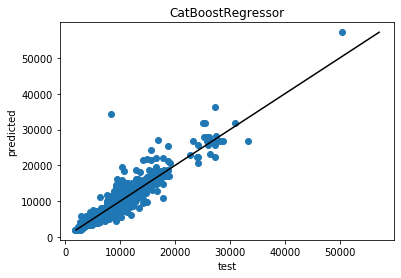

In [102]:
plt.scatter(y_pred_cbr,y_test)
plt.title('CatBoostRegressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

### Feature Imporatance CatBoost Regression

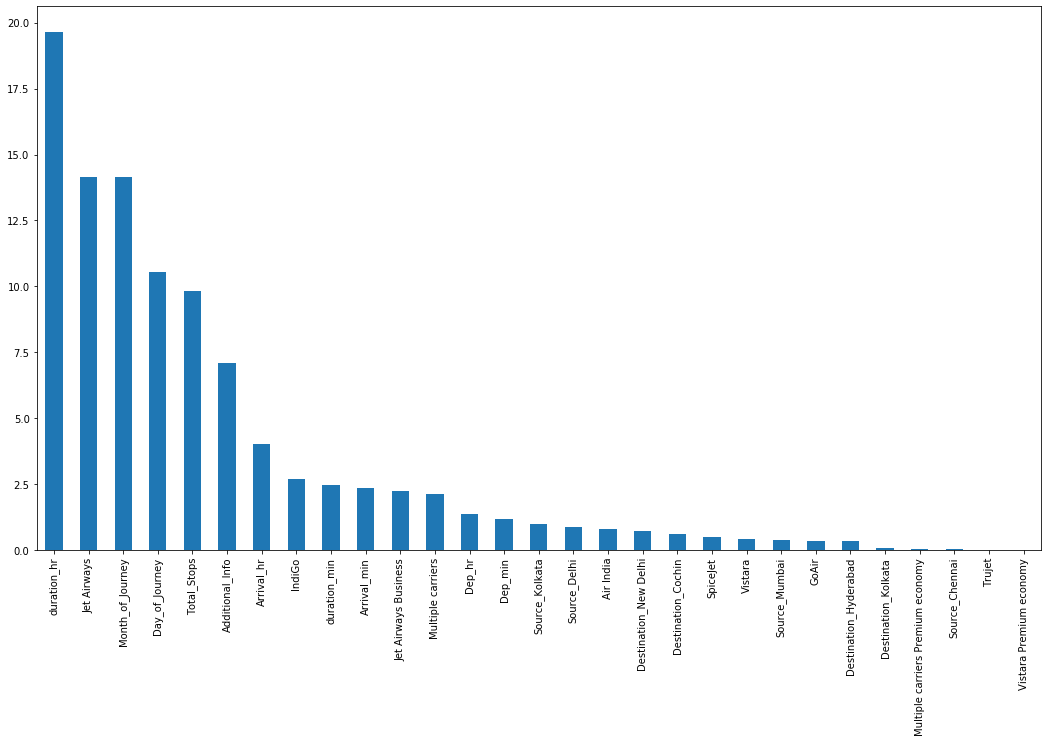

In [103]:
pd.Series(cbr.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10));

## XGBoost Regression

In [104]:
#!pip install xgboost

In [105]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)
print(r2_score(y_test,y_pred_xgb))
r2_scores.append(('XGBRegressor',r2_score(y_test,y_pred_xgb)))

0.9068552520065324


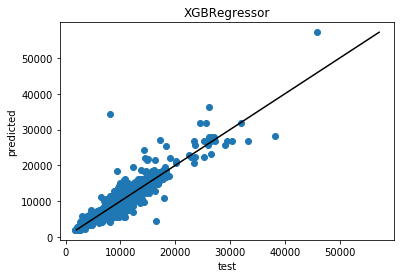

In [106]:
plt.scatter(y_pred_xgb,y_test)
plt.title('XGBRegressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

### Feature Imporatance XGBoost Regression

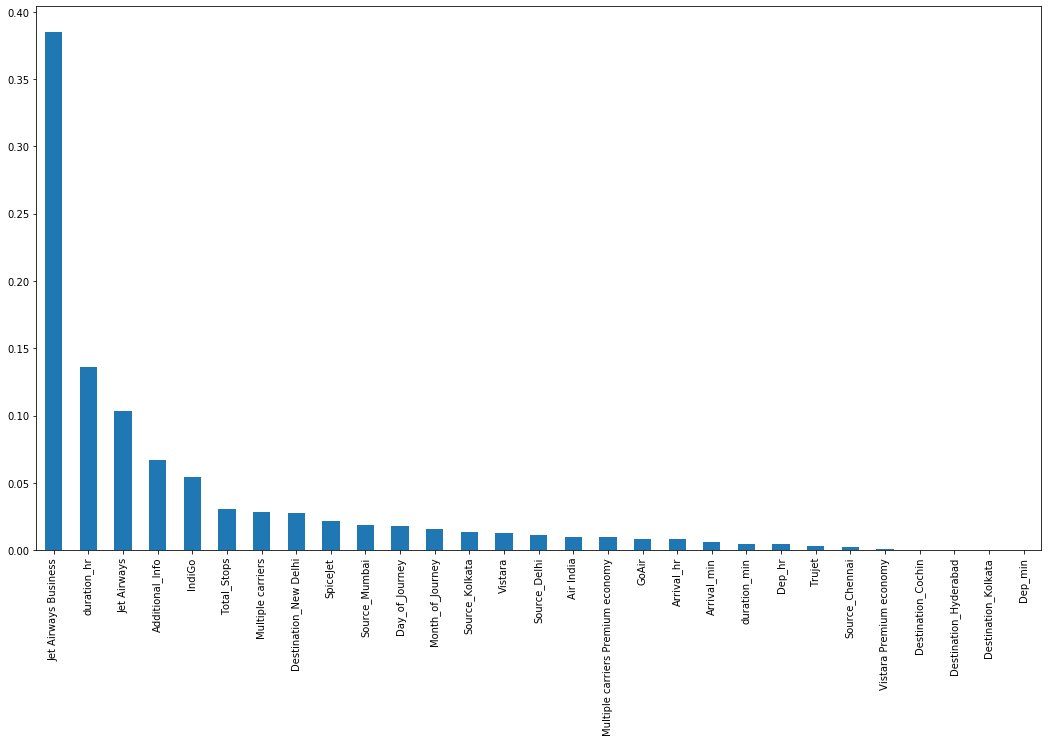

In [107]:
pd.Series(xgb_model.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10));

In [108]:
r2_scores

[('LinearRegression', 0.6181924025435642),
 ('RandomForestRegressor', 0.8719613649651743),
 ('ExtraTreesRegressor', 0.9164236354708359),
 ('CatBoostRegressor', 0.9052549029073239),
 ('XGBRegressor', 0.9068552520065324)]

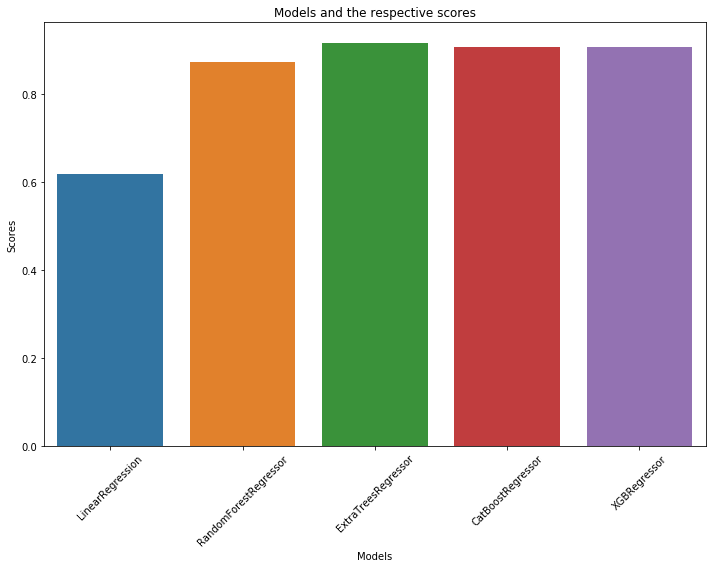

In [109]:
#plotting barplot
df1= pd.DataFrame(r2_scores,columns =['Models', 'Scores']) 
plt.figure(figsize=(10,8))
sns.barplot(x=df1['Models'],y=df1['Scores'])
plt.xticks(rotation=45)

plt.title('Models and the respective scores' )
plt.tight_layout()
plt.show()


In [110]:
df.to_csv('flight_pred_df')

In [111]:
import pickle 
# Saving model to disk
pickle.dump(extr, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [112]:
df22=pd.read_csv('flight_pred_df')
df22.head()

,Unnamed: 0,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,duration_hr,duration_min,Arrival_hr,Arrival_min
0,0,0,0,1,0,0,0,0,0,0,...,0,3897,24,3,22,22,2,50,1,10
1,1,1,0,0,0,0,0,0,0,0,...,0,7662,1,5,5,5,7,25,13,15
2,2,0,0,0,1,0,0,0,0,0,...,0,13882,9,6,9,9,19,0,4,25
3,3,0,0,1,0,0,0,0,0,0,...,0,6218,12,5,18,18,5,25,23,30
4,4,0,0,1,0,0,0,0,0,0,...,0,13302,1,3,16,16,4,45,21,35


In [113]:
df22.columns

Index(['Unnamed: 0', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'duration_hr', 'duration_min',
       'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [114]:
Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

NameError: name 'Index' is not defined